# Logistic Regression Analysis using Framingham Cardiovascular Study #

- Contributors: Chaitanya Pasupala, Lucie Schulz
- Submission Date: Dec. 20th 2022

Abstract: The aim of this analysis is to fit a binary logistic regression machine learning model that accurately predicts whether or not a patients will develop a coronary heart disease in the next 10 years, followed by understanding the influence of significant factors that truly affects them. Next, testing the trained model’s generalization (model evaluation) strength on the unseen data set.

### Scope of study
- Exploratory Analysis
- Data Cleaning to prepare data set for analysis
- Plots of various independent variables to understand the dataset and data patterns.
- Implement Logistic Regression, Logit Model to explain the marginal effects of various variables on the probability of occurence of Coronary Heart Disease after 10 years.
- Prediction: Confusion matrix with lowest false positives and false negatives.

### Info about Dataset ###
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information and includes 4,238 records,16 columns and 15 attributes.

Demographic:
- Sex: male or female (Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
- Education: 0: Less than High School and High School degrees, 1: College Degree and Higher
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical (history)
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical (current)
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target)
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

## 1. Exploratory Analysis

### Data and Library Import

In [5]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize
import statsmodels.api as sm

In [6]:
# read in the data
framingham_data = pd.read_csv('framingham.csv')

In [7]:
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [9]:
len(framingham_data)

4238

In [10]:
# information about the dataset
vital_stats = framingham_data.describe().T
vital_stats['NaN'] = framingham_data.isna().sum()
vital_stats

,count,mean,std,min,25%,50%,75%,max,NaN
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0,0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0,0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0,105
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0,0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0,29
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0,53
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0,0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0,0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0,0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0,50


## 2. Data Preparation & Cleaning ##

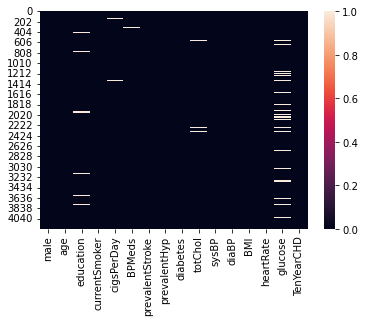

In [14]:
# visualize null values
sns.heatmap(framingham_data.isna())
plt.show()

In [15]:
# Use other covariates to regress and replace missing NaN values
# How we go about - 
# 1. Regress columns that have missing values over those that do not have missing values.
# 2. If the non-NaN columns have good predictions (check r-squared for goodness of fit), we replace
# NaN values using the predicted values.
# 3. If the prediction is not good, figure out some other way like replace with mean or mode
# 4. Also, we make sure that we dont make use of the 'outcome' column as covariate in regression.

# Create a copy of the original dataframe to work on regression

new_fd = pd.DataFrame(framingham_data.drop(columns=['TenYearCHD']))

# Remove all rows with NaN values. This will be the non-NaN training data subset
training_data = new_fd[~new_fd.isnull().any(axis=1)]

# Find the columns that have NaN values
na_columns = new_fd.columns[new_fd.isna().any()]

# Create a dictionary to store the results of regression predictions
predicted_values = {}

# Loop over each of the columns that contains NaN values
for column in na_columns:
    
    Y = training_data[column].to_numpy()
    
    X = training_data.drop(columns=na_columns).to_numpy()
    
    model = sm.OLS(Y,X,missing='raise').fit()
    
    print(column,'\t\t', model.rsquared)
    
    Y = model.predict(new_fd.drop(columns=na_columns).to_numpy())
    
    # Save the predicted values in the dictionary.
    predicted_values.update({column:Y.copy()})
    
# Based on the R-squared, we check the goodness of fit and take a decision on the substitution of NaNs

education 		 0.7791630010172367
cigsPerDay 		 0.7655084829161867
BPMeds 		 0.11844187421567098
totChol 		 0.966716474093699
BMI 		 0.9763742633613963
heartRate 		 0.971007124730545
glucose 		 0.9457709985869588


In [16]:
# As can be seen from above, for BPMeds is not fitting well with the regression model. 
# Also, BPMeds is a categorical variable. So, we better choose mode to replace NaNs.
bpmed_mode = framingham_data['BPMeds'].mode().values[0]
framingham_data['BPMeds'].fillna(bpmed_mode,inplace=True)
predicted_values.pop('BPMeds')

for key in predicted_values.keys():
    framingham_data[key].where(~framingham_data[key].isna(),predicted_values[key],inplace=True)

In [17]:
vital_stats = framingham_data.describe().T
vital_stats['NaN'] = framingham_data.isna().sum()
vital_stats

,count,mean,std,min,25%,50%,75%,max,NaN
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0,0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0,0
education,4238.0,1.979291,1.007720,1.00,1.00,2.0,3.000,4.0,0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0,0
cigsPerDay,4238.0,9.065447,11.904332,0.00,0.00,0.0,20.000,70.0,0
BPMeds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.000,1.0,0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0,0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0,0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0,0
totChol,4238.0,236.805644,44.435167,107.00,206.00,234.0,263.000,696.0,0


In [18]:
framingham_data.insert(loc=0, column='intercept', value=1)
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 3. Data Visualizations ##

This section will give a visual overview of the patient information available in the data set to get a better understanding of the underlying data for the analysis

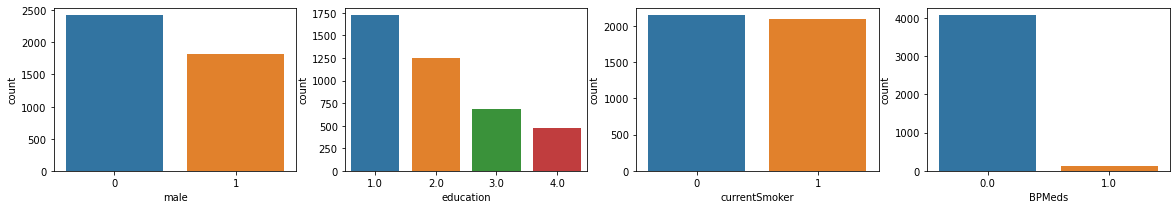

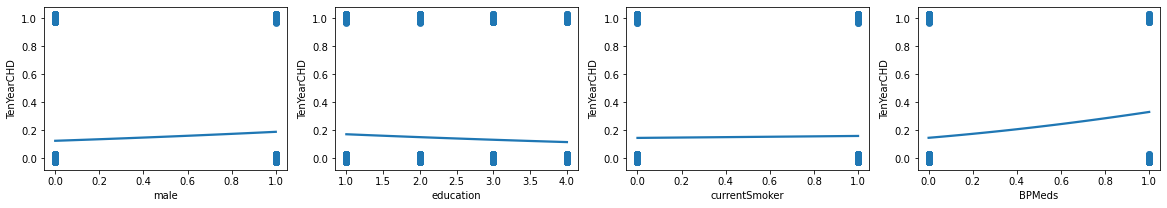

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.countplot(x = 'male', data=framingham_data, ax=ax1)
sns.countplot(x = 'education', data=framingham_data, ax=ax2)
sns.countplot(x = 'currentSmoker', data=framingham_data, ax=ax3)
sns.countplot(x = 'BPMeds', data=framingham_data, ax=ax4)
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.regplot(x = 'male', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'education', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'currentSmoker', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
sns.regplot(x = 'BPMeds', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax4)
plt.show()

Observations:

We can initially fit a logistic regression line using seaborn’s regplot( ) function to visualize how the probability of developing CHD changes based on the different attributes of a patient. This type of plot is only possible when fitting a logistic regression using a single independent variable. The current plots give you an intuition of how the logistic model fits an ‘S’ curve line and how the probability changes from 0 to 1 with observed values. In the oncoming model fitting, we will train/fit a multiple logistic regression model, which includes multiple independent variables.

Male:
- The data set includes more females than males
- The logistic regression line shows that the risk of developing a heart disease is higher for males than females

Education:
- Shows the distribution of educational levels is decreasing, meaning less people in the survey have the highest level of education (seems similar to the distribution in the population)
- The logistic regression line shows that the risk of developing a heart disease decreases with a higher education level

Current Smoker:
- The data set is almost split 50/50 into smokers and non smokers
- The logistic regression line shows that the risk of developing a heart disease increases when being a smoker

BP Meds:
- The plot shows that only a small fraction of patients is currently prescribed Blood Pressure Medication
- The logistic regression line shows that the risk of developing a heart disease increases when taking meds against high blood pressure


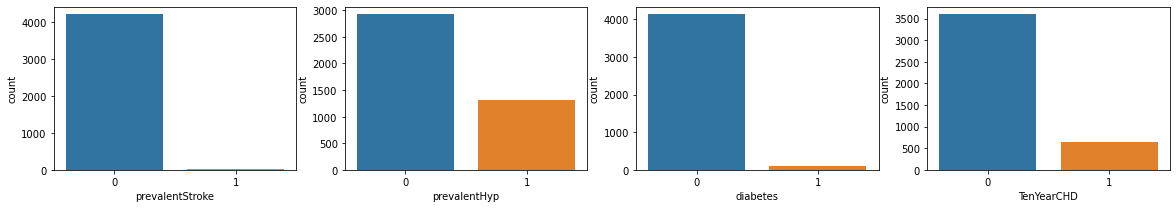

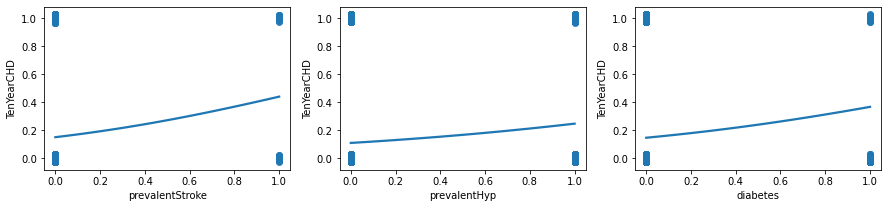

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,3))
sns.countplot(x = 'prevalentStroke', data=framingham_data, ax=ax1)
sns.countplot(x = 'prevalentHyp', data=framingham_data, ax=ax2)
sns.countplot(x = 'diabetes', data=framingham_data, ax=ax3)
sns.countplot(x = 'TenYearCHD', data=framingham_data, ax=ax4)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.regplot(x = 'prevalentStroke', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'prevalentHyp', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'diabetes', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
plt.show()

**Observations:**

Prevalent Stroke:
- Only a small subset of patients in the data had a stroke
- The logistic regression line shows that the risk of developing a heart disease increases when the patient had a stroke previously

Prevalent Hypertension:
- Around a third of the patients in the sample have diagnosed hypertension
- The logistic regression line shows that the risk of developing a heart disease increases with hypertension

Diabetes:
- Only a small percentage of patients in the data set have diabetes 
- The logistic regression line shows that the risk of developing a heart disease increases when having diabetes

Ten Year CHD:
- Shows that about 25% of patients develop a coronary heart disease withon 10 years

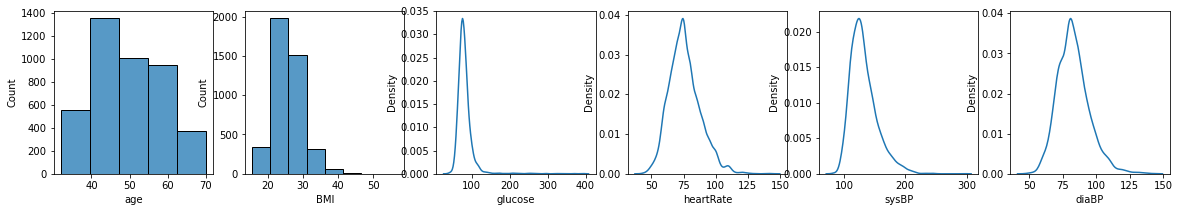

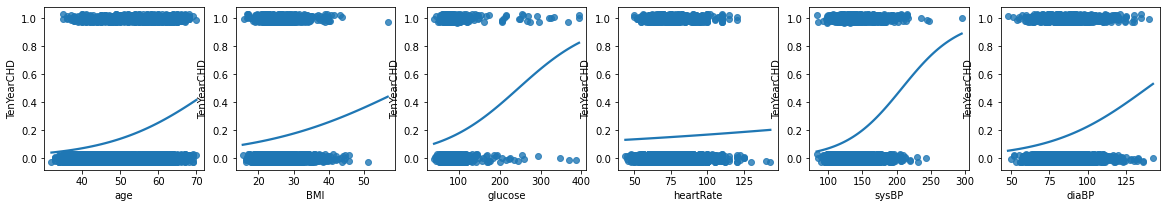

In [13]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20,3))
sns.histplot(x = 'age', data=framingham_data,bins=5, ax=ax1)
sns.histplot(x = 'BMI', data=framingham_data,bins=8, ax=ax2)
sns.kdeplot(framingham_data['glucose'], ax=ax3)
sns.kdeplot(framingham_data['heartRate'], ax=ax4)
sns.kdeplot(framingham_data['sysBP'], ax=ax5)
sns.kdeplot(framingham_data['diaBP'], ax=ax6)
plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20,3))
sns.regplot(x = 'age', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax1)
sns.regplot(x = 'BMI', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax2)
sns.regplot(x = 'glucose', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax3)
sns.regplot(x = 'heartRate', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax4)
sns.regplot(x = 'sysBP', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax5)
sns.regplot(x = 'diaBP', y = 'TenYearCHD', y_jitter = 0.03, data = framingham_data, logistic = True, ci = None, ax=ax6)
plt.show()

Age:
- Shows that the age in the sample ranges from 32 - 70 with the majority of patients being between 40 - 60 years old.
- The logistic regression line shows that the risk of developing a heart disease increases with age

BMI:
- The distribution of the BMI shows that the majority of patients have a normal weight (BMI between 18.5 - 25), but the sample also includes patients with a high BMI (+30) which is considered obese according to the CDC.
- The logistic regression line shows that the risk of developing a heart disease increases with a higher BMI

Glucose:
- The density plot shows that the majority of patients have a glucose level below 100
- The logistic regression line shows that the risk of developing a heart disease increases with a higher glucose level

Heart Rate:
- The plot shows that the heart rate is normal distributed with a few patients having a high heart rate (could be outliers)
- The logistic regression line shows that the risk of developing a heart disease increases with a higher heart rate

Systolic blood pressure:
- The logistic regression line shows that the risk of developing a heart disease increases with higher systolic blood pressure

Diastolic blood pressure:
- The logistic regression line shows that the risk of developing a heart disease increases with higher diastolic blood pressure



**Standardization of variables**

We will convert the normal distribution of the underlying continuous variables into the standard normal distribution. We rescale an original variable to have a mean of zero and standard deviation of one. In order to do this, we use the z-value. The Z-value represents the number of standard deviations an observation is away from the mean. To find the z-score for a particular observation we apply the following formula:

$$
z = \frac{(X - 	\mu) }{\sigma}
$$

where,
* $z = Z-Score$
* $X = The \: value \:of \:the \:element$
* $μ = The \:population \:mean$
* $σ = The \:population \:standard \:deviation $

In [19]:
# function that standardizes the values in a column
def standardize_numeric_features(df, column):
    return round((df[column] - df[column].mean()) / df[column].std(), 6)

framingham_data['age'] = standardize_numeric_features(framingham_data, 'age')
framingham_data['cigsPerDay'] = standardize_numeric_features(framingham_data, 'cigsPerDay')
framingham_data['totChol'] = standardize_numeric_features(framingham_data, 'totChol')
framingham_data['sysBP'] = standardize_numeric_features(framingham_data, 'sysBP')
framingham_data['diaBP'] = standardize_numeric_features(framingham_data, 'diaBP')
framingham_data['BMI'] = standardize_numeric_features(framingham_data, 'BMI')
framingham_data['heartRate'] = standardize_numeric_features(framingham_data, 'heartRate')
framingham_data.head()

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.234805,4.0,0,-0.761525,0.0,0,0,0,-0.940823,-1.195766,-1.082497,0.286887,0.342713,77.0,0
1,1,0,-0.418208,2.0,0,-0.761525,0.0,0,0,0,0.296935,-0.515126,-0.158970,0.718365,1.590096,76.0,0
2,1,1,-0.184895,1.0,1,0.918536,0.0,0,0,0,0.184412,-0.220183,-0.242927,-0.112721,-0.073081,70.0,0
3,1,0,1.331643,3.0,1,1.758566,0.0,0,1,0,-0.265682,0.800777,1.016429,0.681591,-0.904670,103.0,1
4,1,0,-0.418208,3.0,1,1.170545,0.0,0,0,0,1.084599,-0.106743,0.092902,-0.661875,0.758507,85.0,0


## 4. Data Modelling using Logistic Regression

In [20]:
# Separate Dependent and Independent Variables
x = framingham_data[['male','age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = framingham_data['TenYearCHD']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [23]:
# import Logistic Regression package
from sklearn.linear_model import LogisticRegression

In [24]:
# Fit Logistic Regression
lr = LogisticRegression()

In [25]:
lr.fit(x_train, y_train)

/Users/lucieschulz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# predict
prediction = lr.predict(x_test)

**Testing**

In [27]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1183,11
Actual Yes,184,21


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1194
           1       0.66      0.10      0.18       205

    accuracy                           0.86      1399
   macro avg       0.76      0.55      0.55      1399
weighted avg       0.83      0.86      0.81      1399



## 5. Prediction ## 

## 6. Conclusion ##